# Các Scripts sử dụng cho việc trực quan K-Means
- K-Means với 2 cụm trên không gian LSA 2 chiều: `scripts/density_k_means_2clus.py`.
- K-Means với 3 cụm trên không gian LSA 2 chiều: `scripts/density_k_means_3clus.py`.
- K-Means trong không gian 3 chiều động với LSA sử dụng package `plotly`: `scripts/k_means_plotly.py`.


Cluster Distribution:
cluster
1    13729
0     9511
Name: count, dtype: int64


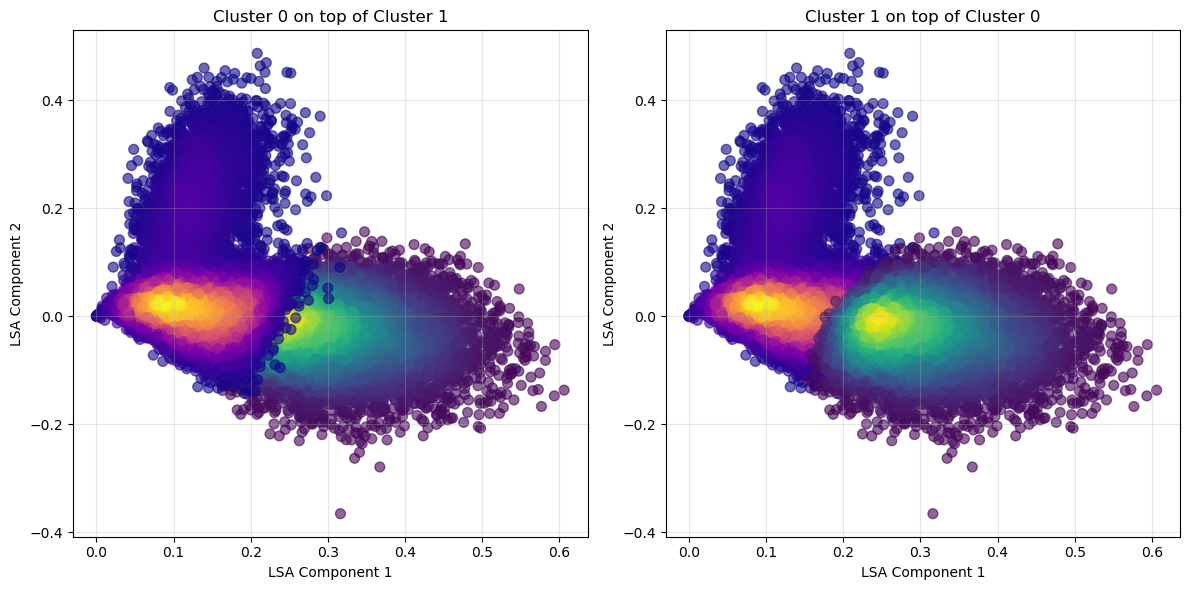

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.preprocessing import normalize

cleaned_corpus = pd.read_csv('data/cleaned_mhc.csv')

tfidf = TfidfVectorizer(max_features=3500)
tfidf_matrix = tfidf.fit_transform(cleaned_corpus['text'])

n_clusters = 2 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cleaned_corpus['cluster'] = kmeans.fit_predict(tfidf_matrix)

lsa = TruncatedSVD(n_components=2, random_state=42)
doc_coords = lsa.fit_transform(tfidf_matrix)


def create_density_plots(doc_coords, labels):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    colors = ['viridis', 'plasma']

    mask0 = labels == 0
    mask1 = labels == 1

    cluster0_points = doc_coords[mask0]
    cluster1_points = doc_coords[mask1]

    xy0 = np.vstack([cluster0_points[:, 0], cluster0_points[:, 1]])
    density0 = gaussian_kde(xy0)(xy0)
    density0 = (density0 - density0.min()) / (density0.max() - density0.min())

    xy1 = np.vstack([cluster1_points[:, 0], cluster1_points[:, 1]])
    density1 = gaussian_kde(xy1)(xy1)
    density1 = (density1 - density1.min()) / (density1.max() - density1.min())

    axs[0].scatter(
        cluster0_points[:, 0],
        cluster0_points[:, 1],
        c=density0,
        cmap=colors[0],
        s=50,
        alpha=0.6
    )
    axs[0].scatter(
        cluster1_points[:, 0],
        cluster1_points[:, 1],
        c=density1,
        cmap=colors[1],
        s=50,
        alpha=0.6
    )
    axs[0].set_title('Cluster 0 on top of Cluster 1')
    axs[0].grid(True, alpha=0.3)

    axs[1].scatter(
        cluster1_points[:, 0],
        cluster1_points[:, 1],
        c=density1,
        cmap=colors[1],
        s=50,
        alpha=0.6
    )
    axs[1].scatter(
        cluster0_points[:, 0],
        cluster0_points[:, 1],
        c=density0,
        cmap=colors[0],
        s=50,
        alpha=0.6
    )
    axs[1].set_title('Cluster 1 on top of Cluster 0')
    axs[1].grid(True, alpha=0.3)

    for ax in axs:
        ax.set_xlabel('LSA Component 1')
        ax.set_ylabel('LSA Component 2')

    plt.tight_layout()
    return plt


plt.style.use('default')
plot = create_density_plots(doc_coords, cleaned_corpus['cluster'])

print("\nCluster Distribution:")
print(cleaned_corpus['cluster'].value_counts())

plt.show()


Cluster Distribution:
cluster
1    13747
0     9493
Name: count, dtype: int64


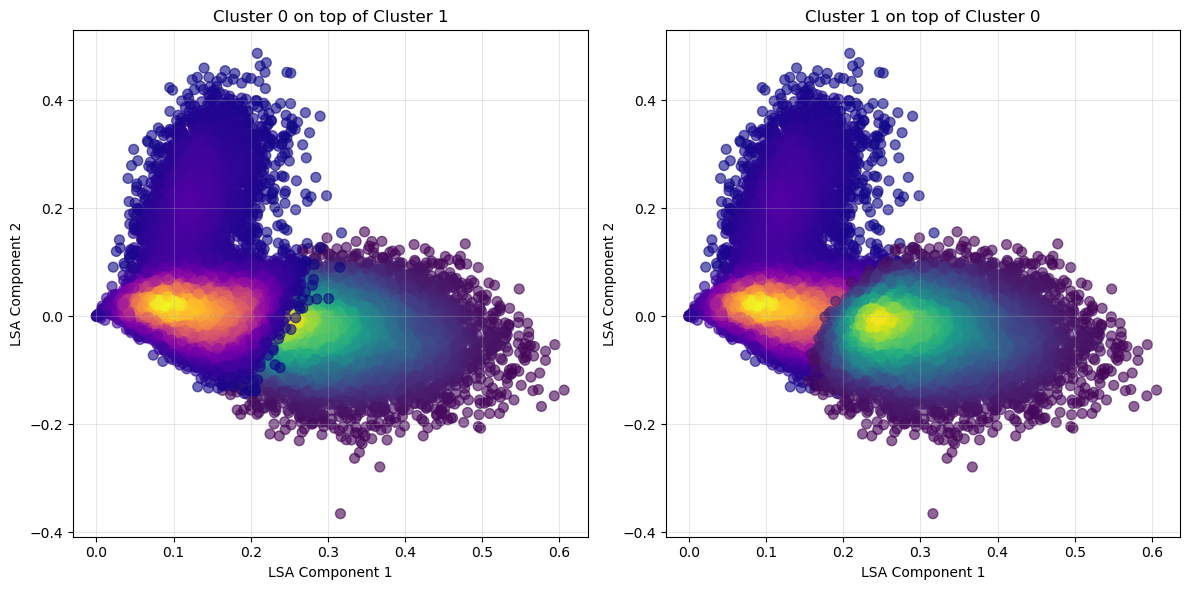

In [2]:
# Load data
cleaned_corpus = pd.read_csv('data/cleaned_mhc.csv')

# Apply TF-IDF
tfidf = TfidfVectorizer(max_features=3500)
tfidf_matrix = tfidf.fit_transform(cleaned_corpus['text'])

# Step 1: Reduce TF-IDF to 100 components using LSA
lsa_100 = TruncatedSVD(n_components=100, random_state=42)
lsa_100_matrix = lsa_100.fit_transform(tfidf_matrix)

# Step 2: Cluster the 100-dimensional LSA data
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cleaned_corpus['cluster'] = kmeans.fit_predict(lsa_100_matrix)

# Step 3: Reduce original TF-IDF to 2 dimensions for visualization
lsa_2 = TruncatedSVD(n_components=2, random_state=42)
doc_coords = lsa_2.fit_transform(tfidf_matrix)

# Function to create density plots
def create_density_plots(doc_coords, labels):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    colors = ['viridis', 'plasma']

    mask0 = labels == 0
    mask1 = labels == 1

    cluster0_points = doc_coords[mask0]
    cluster1_points = doc_coords[mask1]

    xy0 = np.vstack([cluster0_points[:, 0], cluster0_points[:, 1]])
    density0 = gaussian_kde(xy0)(xy0)
    density0 = (density0 - density0.min()) / (density0.max() - density0.min())

    xy1 = np.vstack([cluster1_points[:, 0], cluster1_points[:, 1]])
    density1 = gaussian_kde(xy1)(xy1)
    density1 = (density1 - density1.min()) / (density1.max() - density1.min())

    axs[0].scatter(
        cluster0_points[:, 0],
        cluster0_points[:, 1],
        c=density0,
        cmap=colors[0],
        s=50,
        alpha=0.6
    )
    axs[0].scatter(
        cluster1_points[:, 0],
        cluster1_points[:, 1],
        c=density1,
        cmap=colors[1],
        s=50,
        alpha=0.6
    )
    axs[0].set_title('Cluster 0 on top of Cluster 1')
    axs[0].grid(True, alpha=0.3)

    axs[1].scatter(
        cluster1_points[:, 0],
        cluster1_points[:, 1],
        c=density1,
        cmap=colors[1],
        s=50,
        alpha=0.6
    )
    axs[1].scatter(
        cluster0_points[:, 0],
        cluster0_points[:, 1],
        c=density0,
        cmap=colors[0],
        s=50,
        alpha=0.6
    )
    axs[1].set_title('Cluster 1 on top of Cluster 0')
    axs[1].grid(True, alpha=0.3)

    for ax in axs:
        ax.set_xlabel('LSA Component 1')
        ax.set_ylabel('LSA Component 2')

    plt.tight_layout()
    return plt

# Plot and show cluster density
plt.style.use('default')
plot = create_density_plots(doc_coords, cleaned_corpus['cluster'])

print("\nCluster Distribution:")
print(cleaned_corpus['cluster'].value_counts())

plt.show()


Cluster Distribution:
cluster
2    12403
0     8814
1     2023
Name: count, dtype: int64


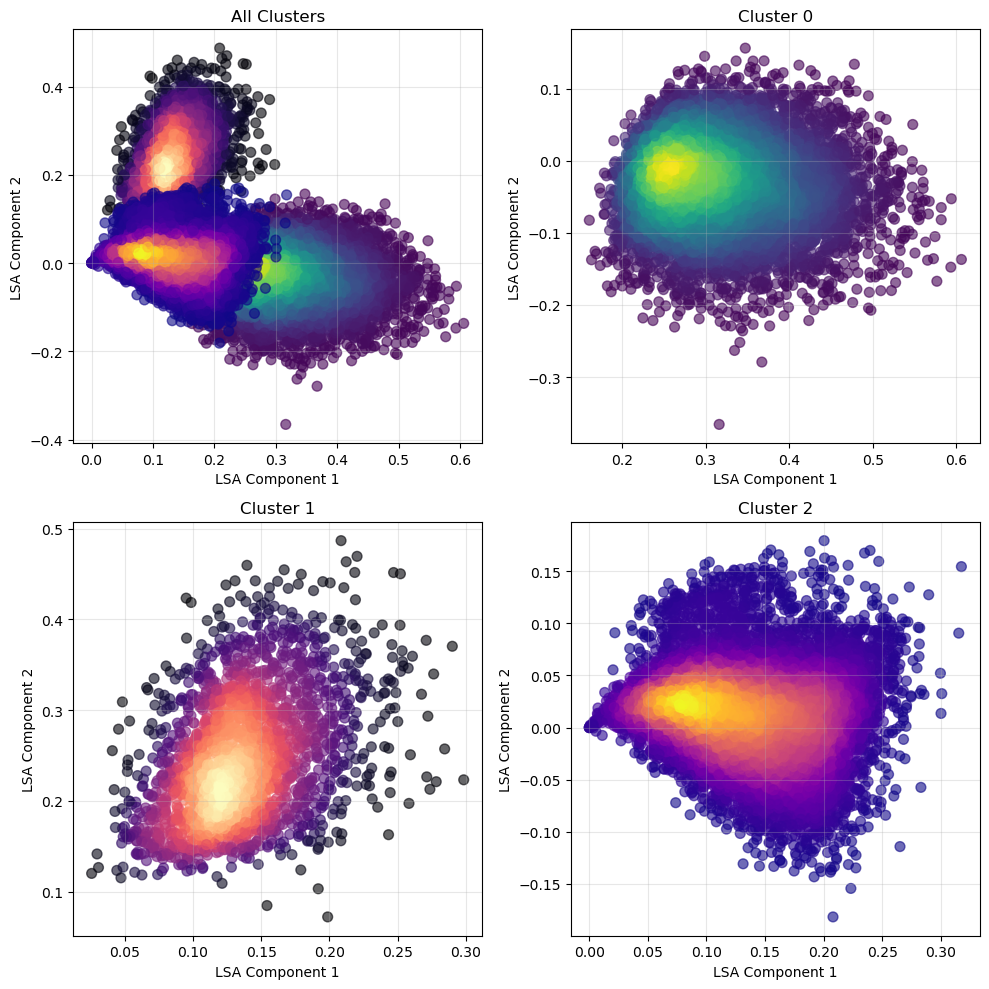

In [3]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cleaned_corpus['cluster'] = kmeans.fit_predict(tfidf_matrix)

lsa = TruncatedSVD(n_components=2, random_state=42)
doc_coords = lsa.fit_transform(tfidf_matrix)

def create_multi_density_plots(doc_coords, labels):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    colors = ['viridis', 'magma', 'plasma']

    axs = axs.flatten()

    for i in range(n_clusters):
        mask = labels == i
        cluster_points = doc_coords[mask]

        xy = np.vstack([cluster_points[:, 0], cluster_points[:, 1]])
        density = gaussian_kde(xy)(xy)
        density = (density - density.min()) / (density.max() - density.min())

        axs[0].scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            c=density,
            cmap=colors[i],
            s=50,
            alpha=0.6
        )

    axs[0].set_title('All Clusters')
    axs[0].grid(True, alpha=0.3)

    for i in range(n_clusters):
        mask = labels == i
        cluster_points = doc_coords[mask]

        xy = np.vstack([cluster_points[:, 0], cluster_points[:, 1]])
        density = gaussian_kde(xy)(xy)
        density = (density - density.min()) / (density.max() - density.min())

        axs[i + 1].scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            c=density,
            cmap=colors[i],
            s=50,
            alpha=0.6
        )
        axs[i + 1].set_title(f'Cluster {i}')
        axs[i + 1].grid(True, alpha=0.3)

    for ax in axs:
        ax.set_xlabel('LSA Component 1')
        ax.set_ylabel('LSA Component 2')

    plt.tight_layout()
    return plt


plt.style.use('default')
plot = create_multi_density_plots(doc_coords, cleaned_corpus['cluster'])

print("\nCluster Distribution:")
print(cleaned_corpus['cluster'].value_counts())

plt.show()


Cluster Distribution:
cluster
1    12422
0     8810
2     2008
Name: count, dtype: int64


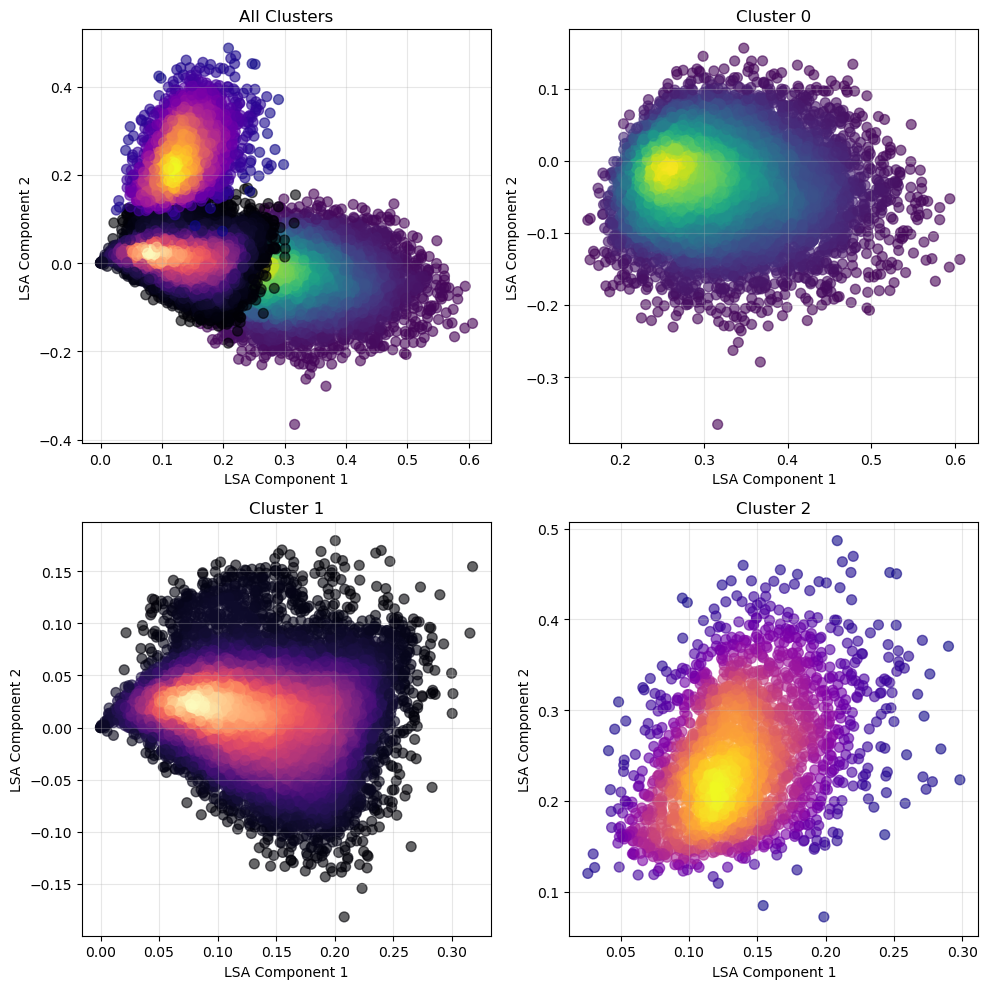

In [4]:
# Step 1: Reduce TF-IDF to 100 components using LSA
lsa_100 = TruncatedSVD(n_components=100, random_state=42)
lsa_100_matrix = lsa_100.fit_transform(tfidf_matrix)

# Step 2: Cluster the 100-dimensional LSA data
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cleaned_corpus['cluster'] = kmeans.fit_predict(lsa_100_matrix)

# Step 3: Reduce original TF-IDF to 2 dimensions for visualization
lsa_2 = TruncatedSVD(n_components=2, random_state=42)
doc_coords = lsa_2.fit_transform(tfidf_matrix)


lsa = TruncatedSVD(n_components=2, random_state=42)
doc_coords = lsa.fit_transform(tfidf_matrix)

def create_multi_density_plots(doc_coords, labels):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    colors = ['viridis', 'magma', 'plasma']

    axs = axs.flatten()

    for i in range(n_clusters):
        mask = labels == i
        cluster_points = doc_coords[mask]

        xy = np.vstack([cluster_points[:, 0], cluster_points[:, 1]])
        density = gaussian_kde(xy)(xy)
        density = (density - density.min()) / (density.max() - density.min())

        axs[0].scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            c=density,
            cmap=colors[i],
            s=50,
            alpha=0.6
        )

    axs[0].set_title('All Clusters')
    axs[0].grid(True, alpha=0.3)

    for i in range(n_clusters):
        mask = labels == i
        cluster_points = doc_coords[mask]

        xy = np.vstack([cluster_points[:, 0], cluster_points[:, 1]])
        density = gaussian_kde(xy)(xy)
        density = (density - density.min()) / (density.max() - density.min())

        axs[i + 1].scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            c=density,
            cmap=colors[i],
            s=50,
            alpha=0.6
        )
        axs[i + 1].set_title(f'Cluster {i}')
        axs[i + 1].grid(True, alpha=0.3)

    for ax in axs:
        ax.set_xlabel('LSA Component 1')
        ax.set_ylabel('LSA Component 2')

    plt.tight_layout()
    return plt


plt.style.use('default')
plot = create_multi_density_plots(doc_coords, cleaned_corpus['cluster'])

print("\nCluster Distribution:")
print(cleaned_corpus['cluster'].value_counts())

plt.show()

In [7]:
from collections import defaultdict
import numpy as np
import pandas as pd

cleaned_corpus = pd.read_csv('data/cleaned_mhc.csv')

tfidf = TfidfVectorizer(max_features=3500)
tfidf_matrix = tfidf.fit_transform(cleaned_corpus['text'])

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cleaned_corpus['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Create a dataframe of terms with their corresponding TF-IDF scores
tfidf_feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Add cluster labels to the TF-IDF dataframe
tfidf_df['cluster'] = cleaned_corpus['cluster']

# Dictionary to store the top terms for each cluster
top_terms_per_cluster = defaultdict(list)

# Calculate top 10 terms for each cluster
for cluster_num in range(n_clusters):
    cluster_data = tfidf_df[tfidf_df['cluster'] == cluster_num].drop(columns=['cluster'])
    term_sums = cluster_data.sum(axis=0)  # Sum TF-IDF scores for each term
    top_terms = term_sums.sort_values(ascending=False).head(150)  # Top 10 terms
    top_terms_per_cluster[cluster_num] = top_terms

# Display the top 10 terms for each cluster
for cluster, terms in top_terms_per_cluster.items():
    print(f"Cluster {cluster}:")
    print(terms)
    print()

Cluster 0:
im        575.761566
cant      150.252436
ive       130.442400
know      121.081936
dont      113.011872
             ...    
though     22.222686
lot        22.184836
dad        22.111069
guy        22.096672
wanted     21.864623
Length: 150, dtype: float64

Cluster 1:
help       154.169164
need       111.894365
please     107.016329
someone     63.514532
im          50.498292
              ...    
send         6.088671
done         6.082706
hey          5.951812
able         5.921084
online       5.888455
Length: 150, dtype: float64

Cluster 2:
wanna       133.438333
im           29.175487
anyone       25.366480
bored        25.018721
talk         24.471116
               ...    
mean          2.600150
actually      2.599181
fun           2.596886
every         2.573427
best          2.557426
Length: 150, dtype: float64

Cluster 3:
life      264.297965
year      190.294057
im        188.087730
time      169.917808
ive       165.862292
             ...    
sure       40.687